In [1]:
# refer from : https://fairyonice.github.io/implement-lbp-from%20scratch.html

import numpy as np
import cv2
from matplotlib import pyplot as plt
import logging
from pathlib import Path
from dotenv import find_dotenv, load_dotenv
import pandas as pd
import os
import os.path as osp
import skimage.io
import skimage.color
import skimage.filters
from PIL import Image, ImageDraw


from src.features.build_features import detect_outside_circle, detect_inner_ring

In [2]:
__file__ = os.path.abspath('')

project_dir = Path(__file__).resolve()

print(project_dir)


p_dn = Path(str(project_dir) + '/../data/raw/dn').resolve()
p_pc = Path(str(project_dir) + '/../data/raw/pc').resolve()

/Users/bruceliu/projects/milk_cls/notebooks


In [3]:
def getLBPimage(image):
    '''
    == Input ==
    gray_image  : color image of shape (height, width)
    
    == Output ==  
    imgLBP : LBP converted image of the same shape as 
    '''
    
    ### Step 0: Step 0: Convert an image to grayscale
    gray_image = image
#     cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    imgLBP = np.zeros_like(gray_image)
    neighboor = 3 
    for ih in range(0,image.shape[0] - neighboor):
        for iw in range(0,image.shape[1] - neighboor):
            ### Step 1: 3 by 3 pixel
            img          = gray_image[ih:ih+neighboor,iw:iw+neighboor]
            center       = img[1,1]
            img01        = (img >= center)*1.0
            img01_vector = img01.T.flatten()
            # it is ok to order counterclock manner
            # img01_vector = img01.flatten()
            ### Step 2: **Binary operation**:
            img01_vector = np.delete(img01_vector,4)
            ### Step 3: Decimal: Convert the binary operated values to a digit.
            where_img01_vector = np.where(img01_vector)[0]
            if len(where_img01_vector) >= 1:
                num = np.sum(2**where_img01_vector)
            else:
                num = 0
            imgLBP[ih+1,iw+1] = num
    return(imgLBP)

In [4]:
def draw_circles(img,circles):
    color = (255, 0, 0)
    # Line thickness of -1 px
    thickness = 10
    if circles is not None:
        circles = np.uint16(np.around(circles))
        num = 0
        for i in circles[0, :]:
            # print('i is ', i)
            num = num + 1
            cv2.circle(img, (i[0], i[1]), i[2], color, num*10)
    return img
#     plt.title(title)
#     plt.imshow(img)
#     plt.show()


In [5]:
def extract_infor_circle(img_origin, x, y, r):
#     print(img_origin.shape)
    img_arr = img_origin
#     np.array(cv2.cvtColor(img_origin, cv2.COLOR_BGR2GRAY))
    h,w = img_arr.shape[1], img_arr.shape[0]
    # creating luminous image
    lum_img = Image.new('L',[h,w] ,0) 
    draw = ImageDraw.Draw(lum_img)

    leftUpPoint = (x-r, y-r)
    rightDownPoint = (x+r, y+r)
    twoPointList = [leftUpPoint, rightDownPoint]
    draw.ellipse(twoPointList, fill=255)

#     img_arr = np.array(cv2.cvtColor(img_origin, cv2.COLOR_BGR2GRAY))
    lum_img_arr = np.array(lum_img)
#     print(img_arr.shape)
#     print(lum_img_arr.shape)
    final_img_arr = np.dstack((img_arr, lum_img_arr))
#     display(Image.fromarray(final_img_arr))
#     new_image = Image.fromarray(final_img_arr)
#     print('new_image size is ', new_image.size)
#     plt.imshow(new_image)
#     plt.show()
    return final_img_arr
#     plt.show()
#     print(final_img_arr.shape)

In [6]:
def main_lbp(data_dir):
    for x in data_dir.iterdir():
            # print(x)
        circles, num_cirlces, image = detect_outside_circle(str(x), draw_circle=False)

    #     print(circles[0][0])
        merged_image = extract_infor_circle(image, circles[0][0][0], circles[0][0][1], circles[0][0][2])
    #     print(image.shape)
    #     print(merged_image.shape)
        imgLBP    = getLBPimage(merged_image)
    #     print(imgLBP.shape)
        vecimgLBP = imgLBP.flatten()
        fig = plt.figure(figsize=(20,8))
        ax  = fig.add_subplot(1,3,1)
        ax.imshow(draw_circles(image, circles))
        ax.set_title("gray scale image")
        ax  = fig.add_subplot(1,3,2)
        ax.imshow(Image.fromarray(imgLBP))
        ax.set_title("LBP converted image")
        ax  = fig.add_subplot(1,3,3)
        freq,lbp, _ = ax.hist(vecimgLBP,bins=2**8)
        ax.set_ylim(0,100000)
        lbp = lbp[:-1]
        ax.set_title("LBP histogram")
        plt.show()

The number of circle is  1


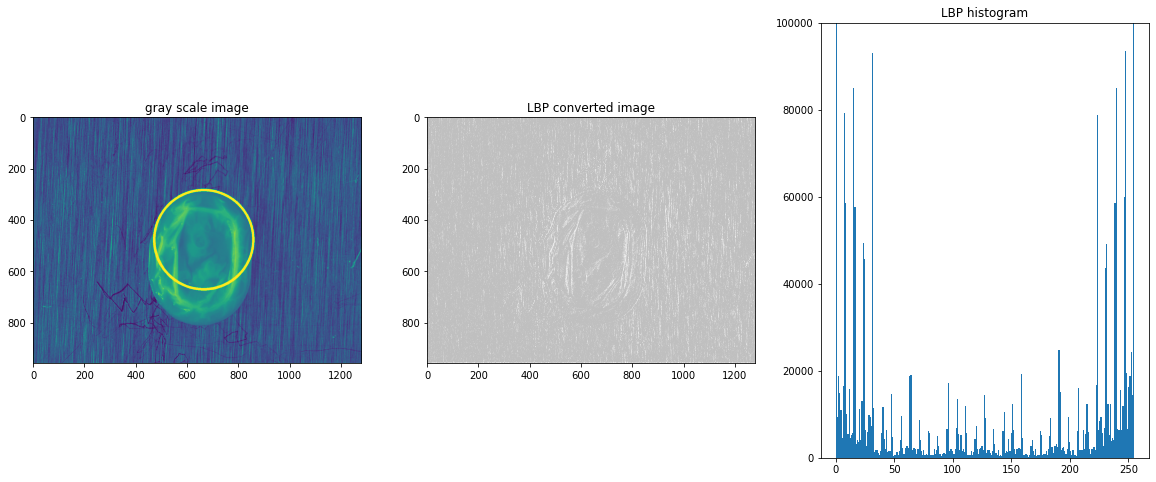

The number of circle is  1


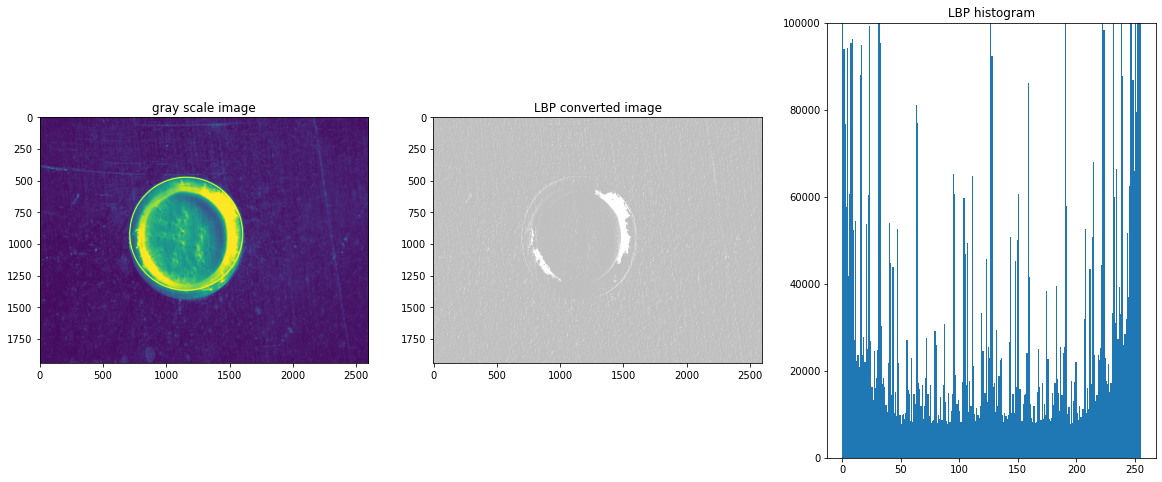

The number of circle is  1


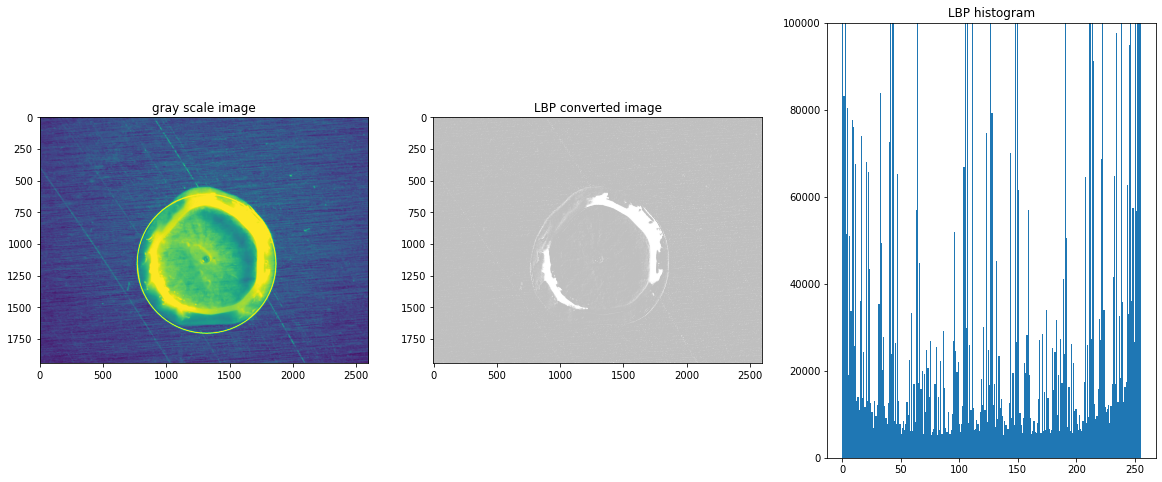

The number of circle is  1


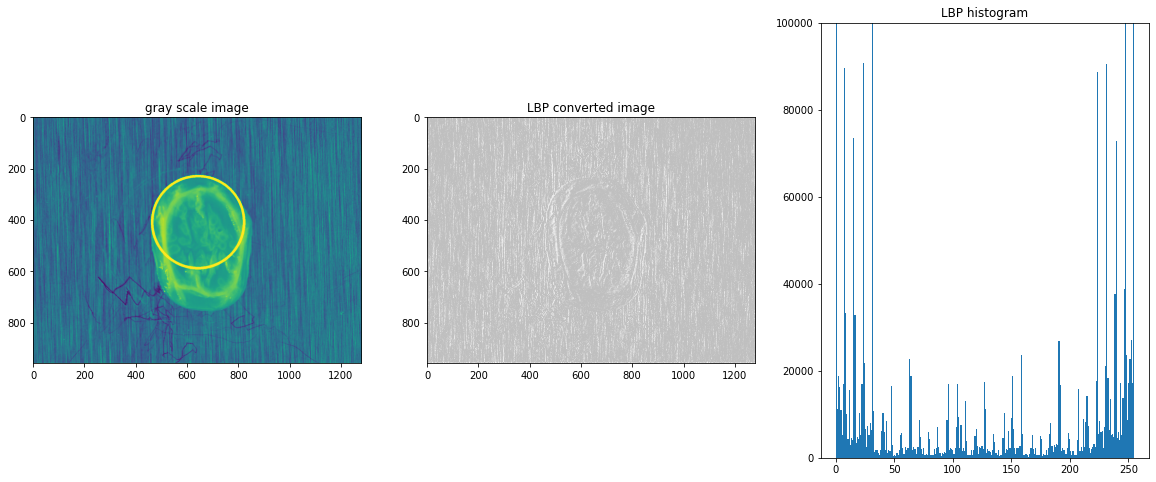

The number of circle is  1


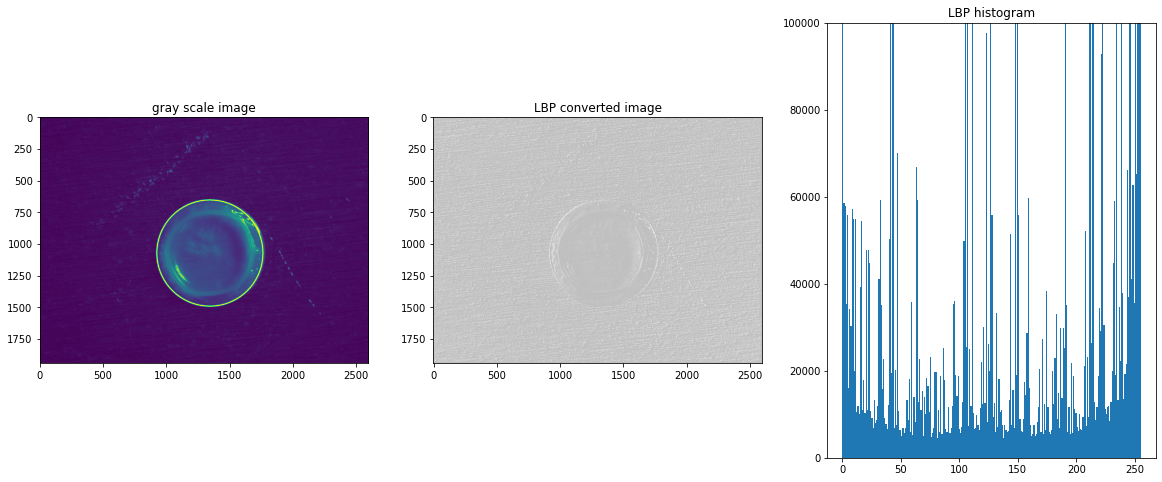

The number of circle is  1


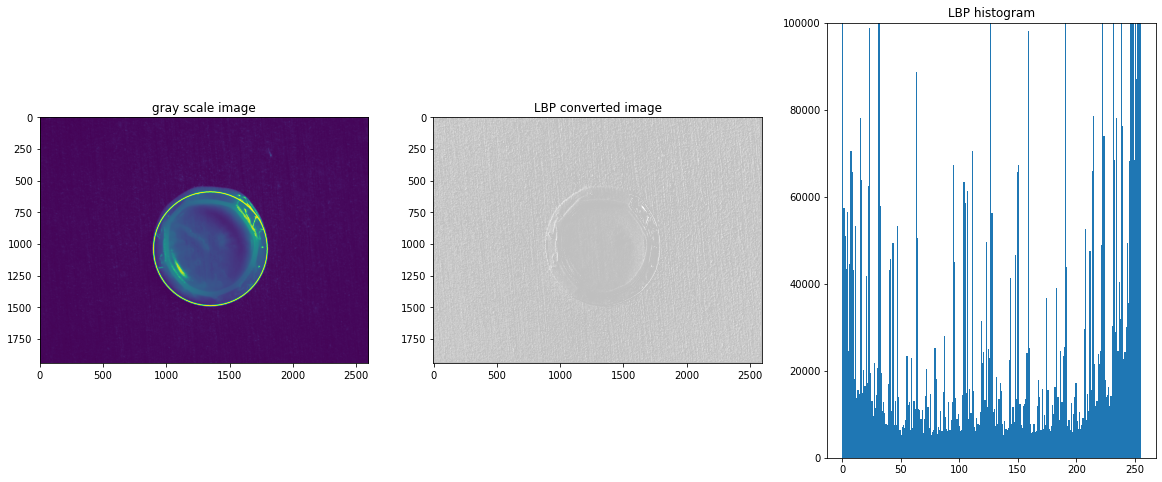

The number of circle is  1


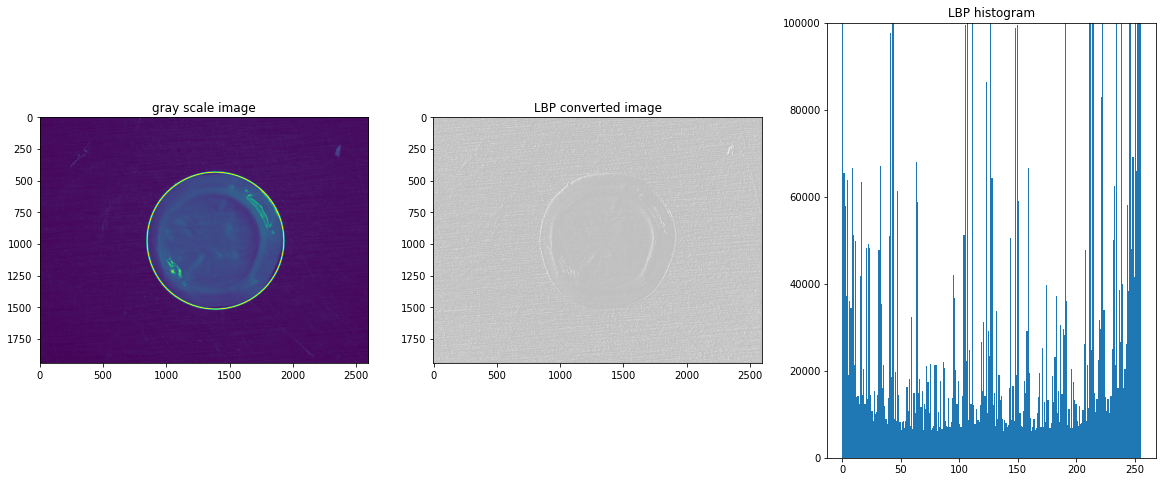

The number of circle is  1


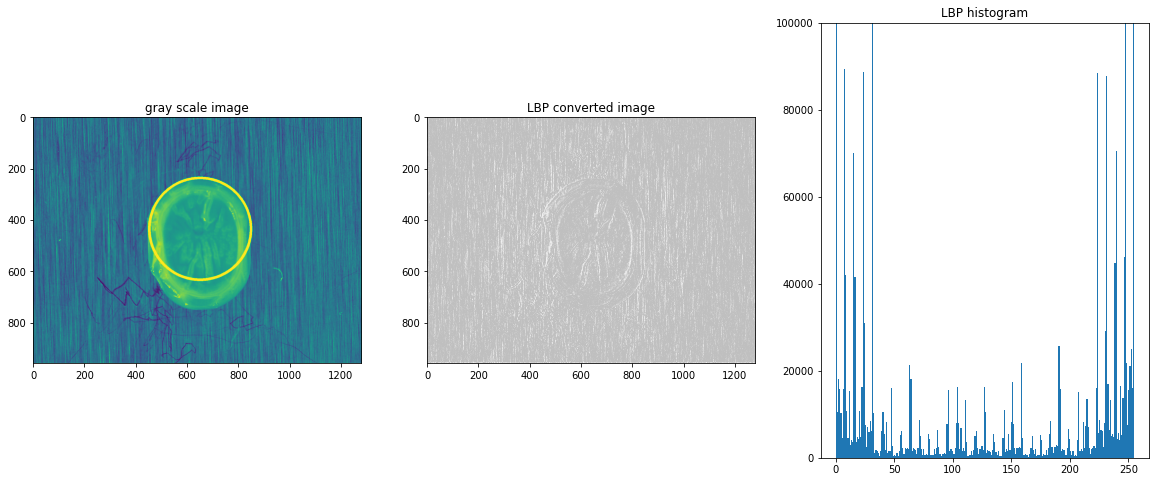

The number of circle is  1


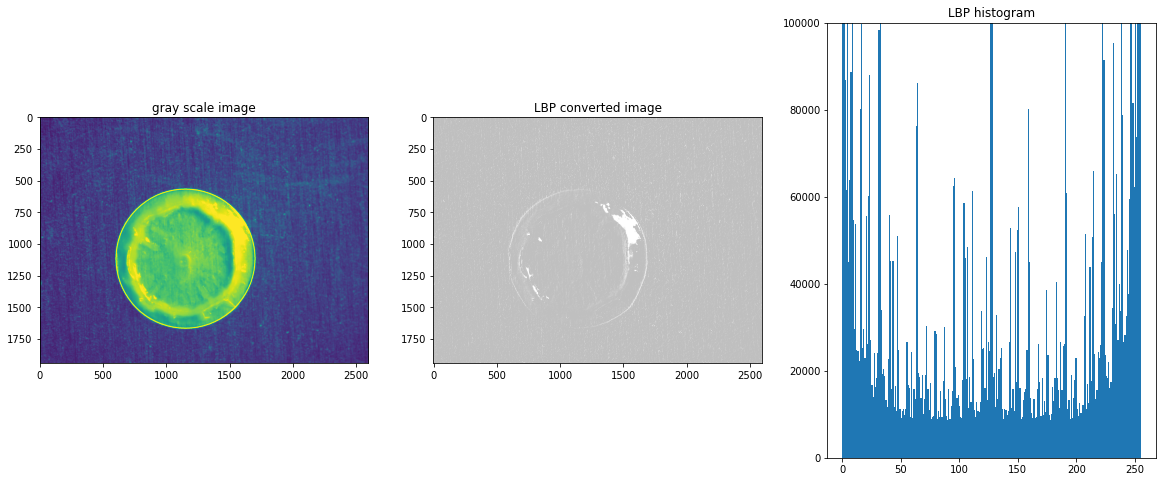

The number of circle is  1


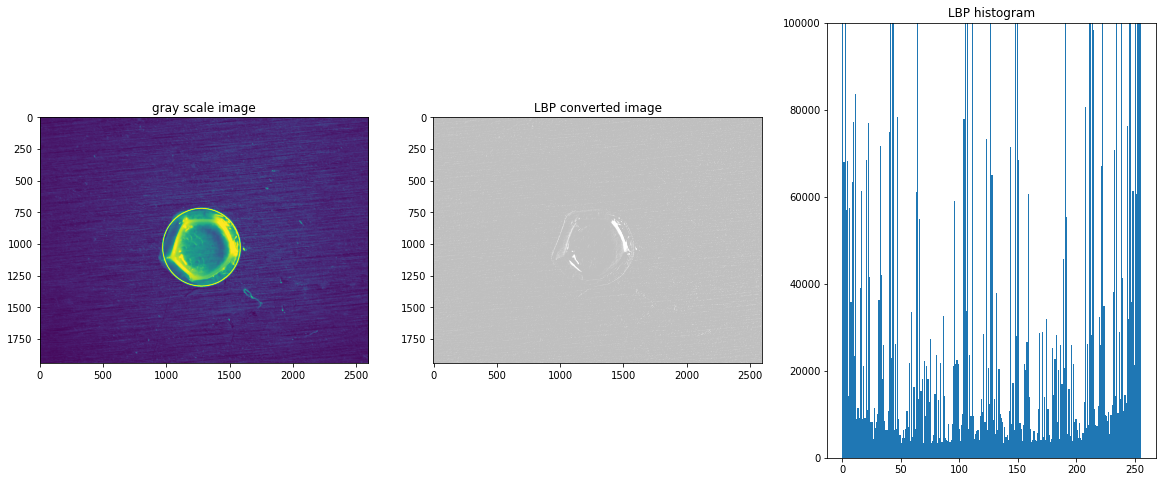

The number of circle is  1


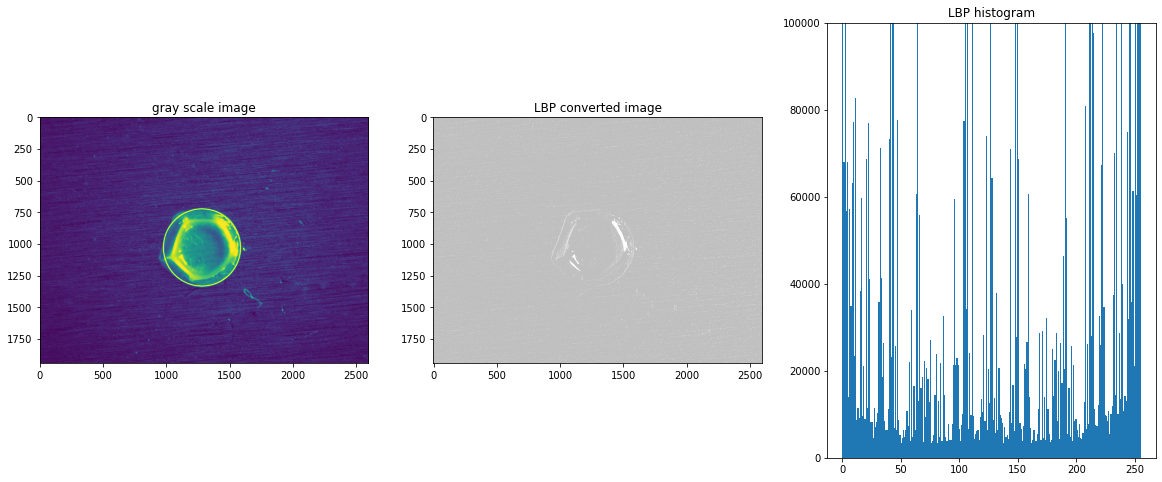

The number of circle is  1


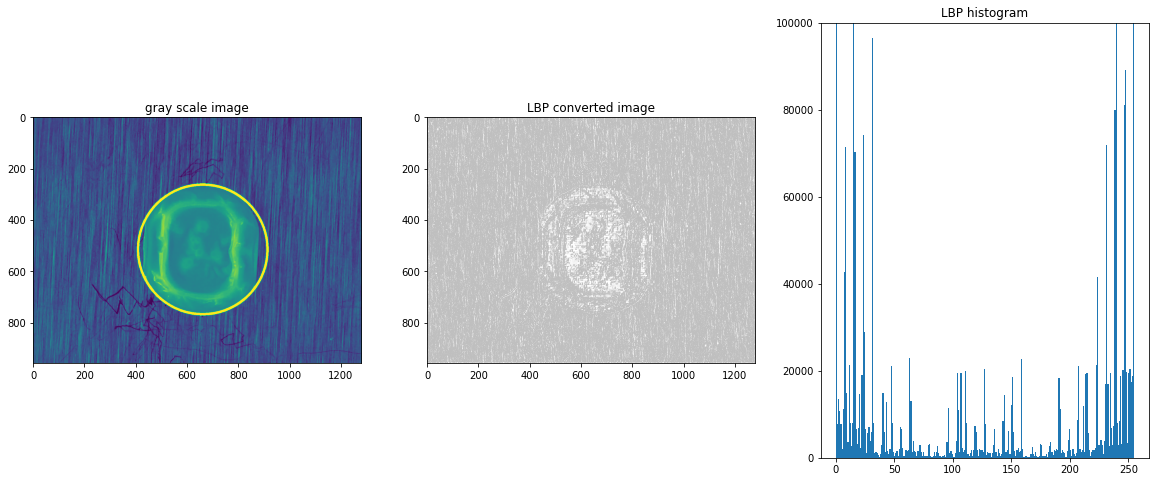

The number of circle is  1


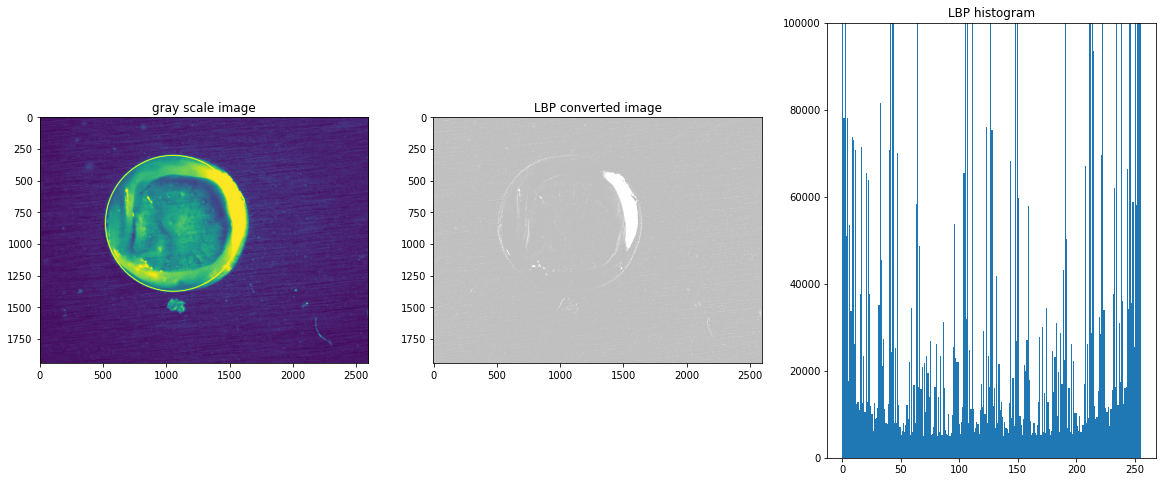

The number of circle is  1


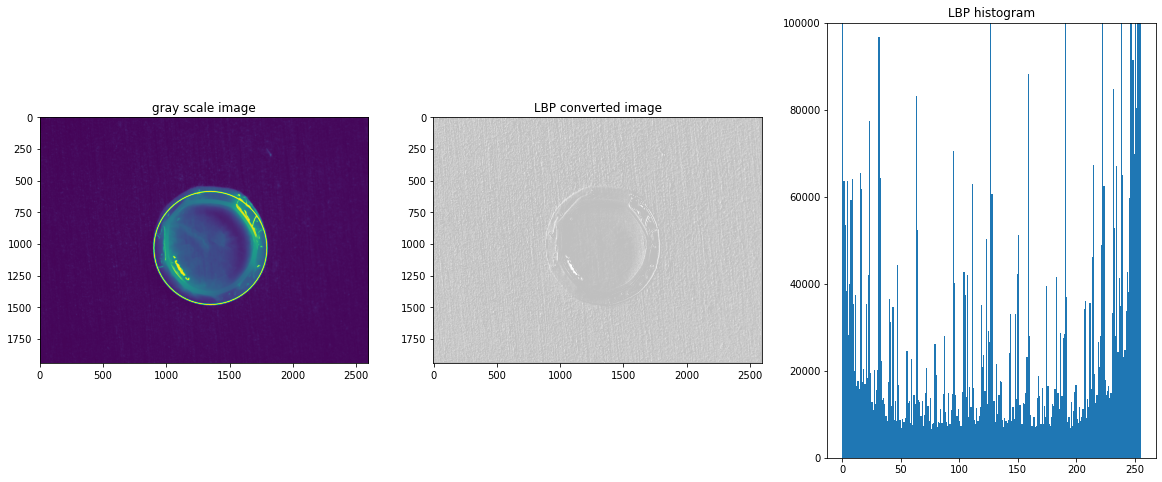

The number of circle is  1


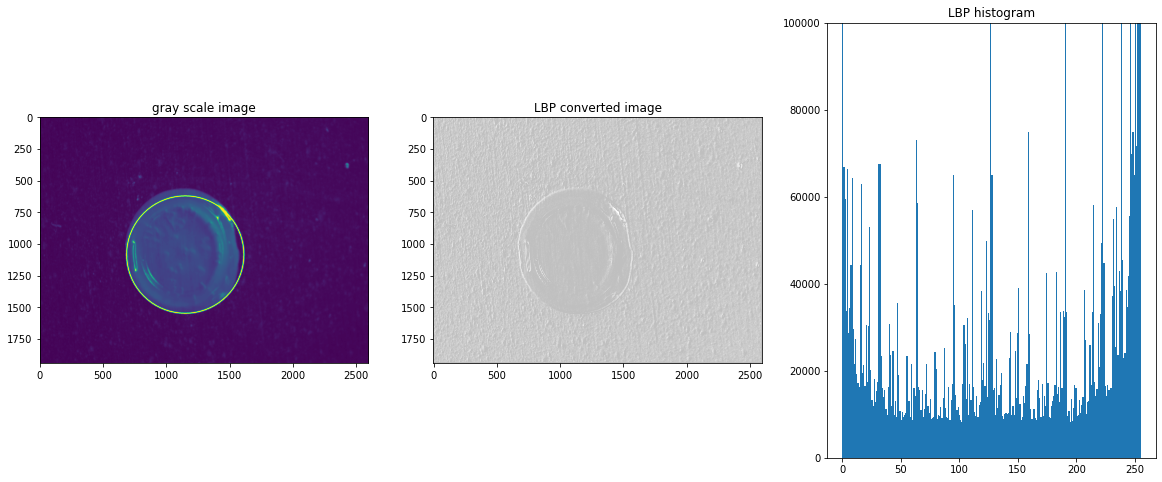

The number of circle is  1


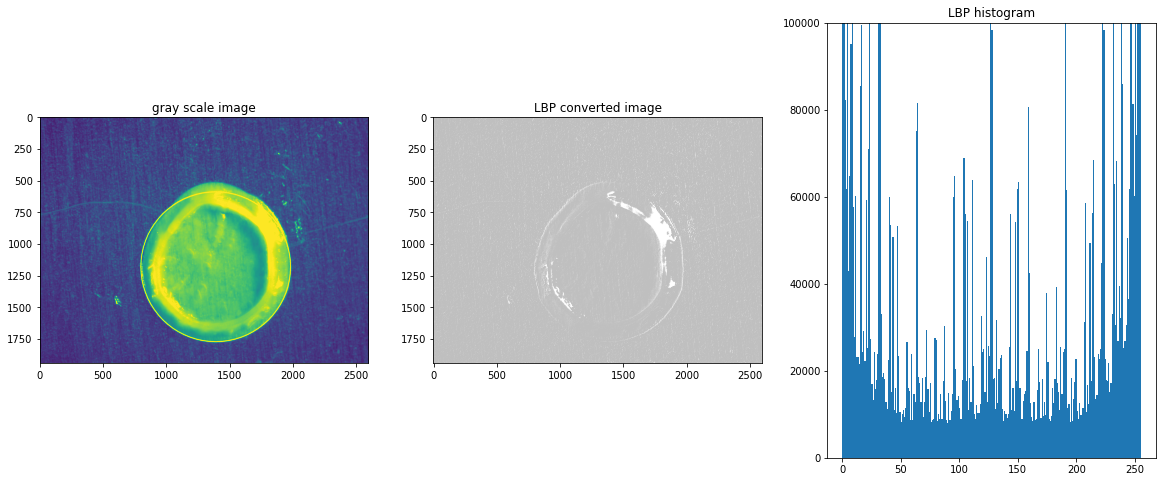

The number of circle is  1


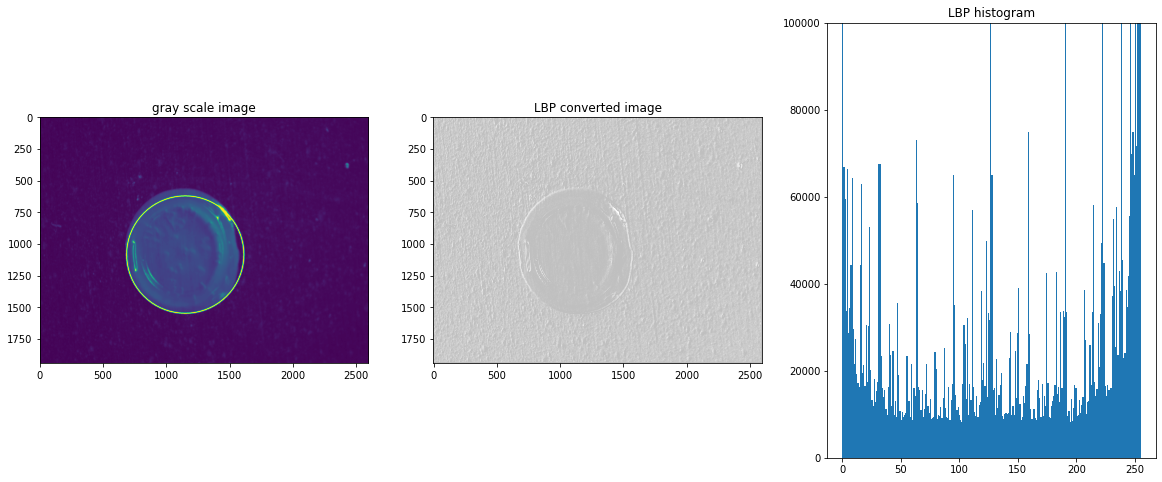

In [7]:
main_lbp(p_dn)

The number of circle is  1


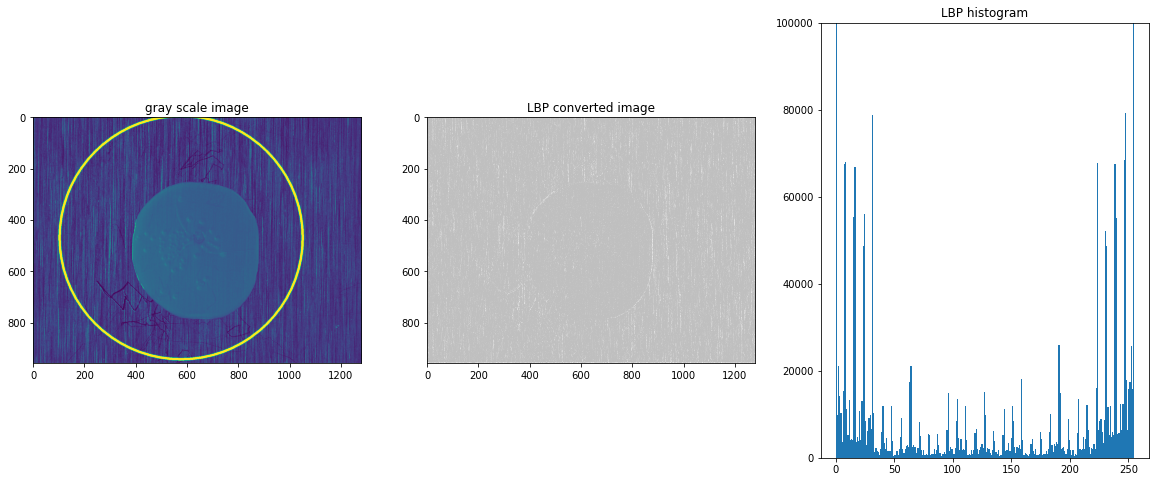

The number of circle is  1


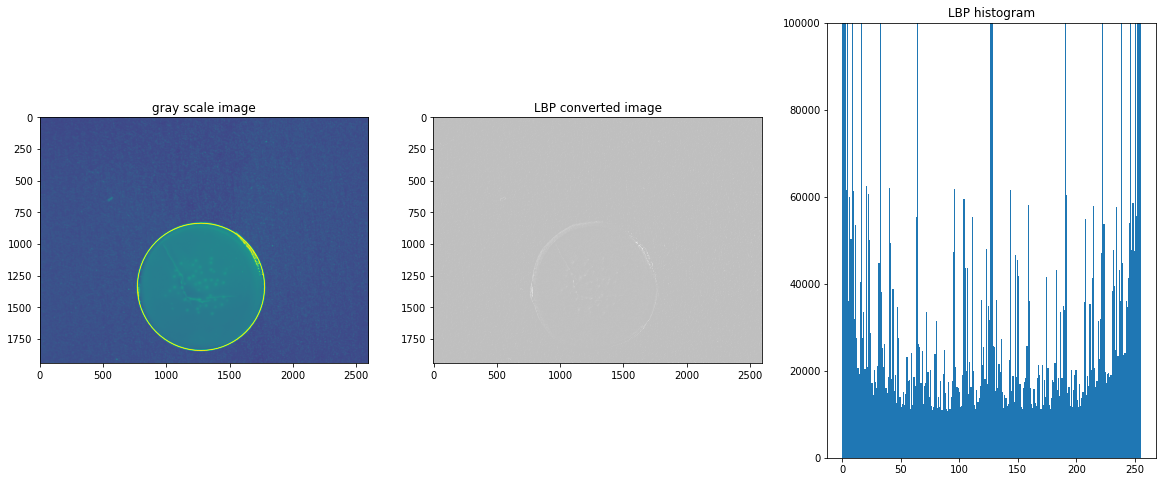

The number of circle is  1


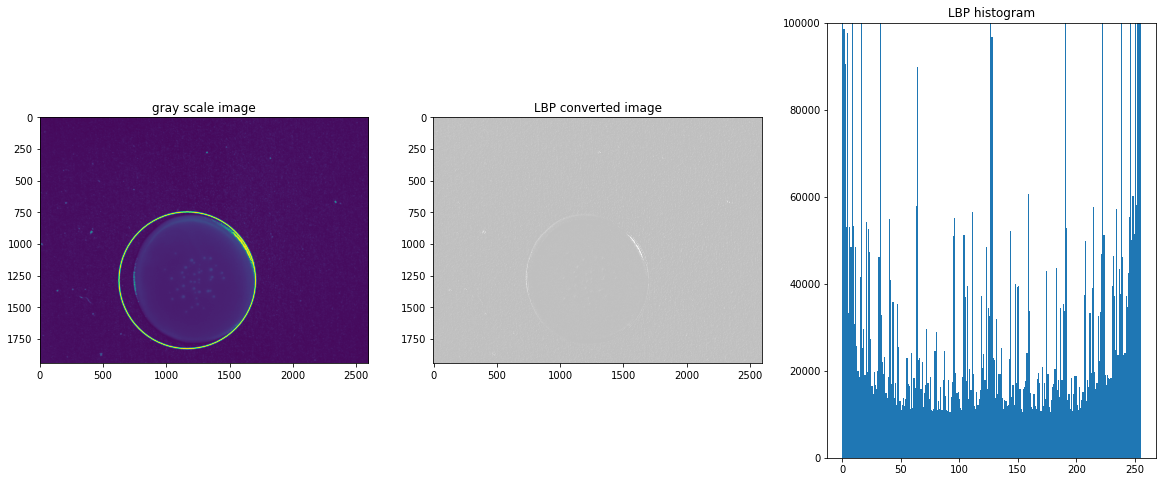

The number of circle is  1


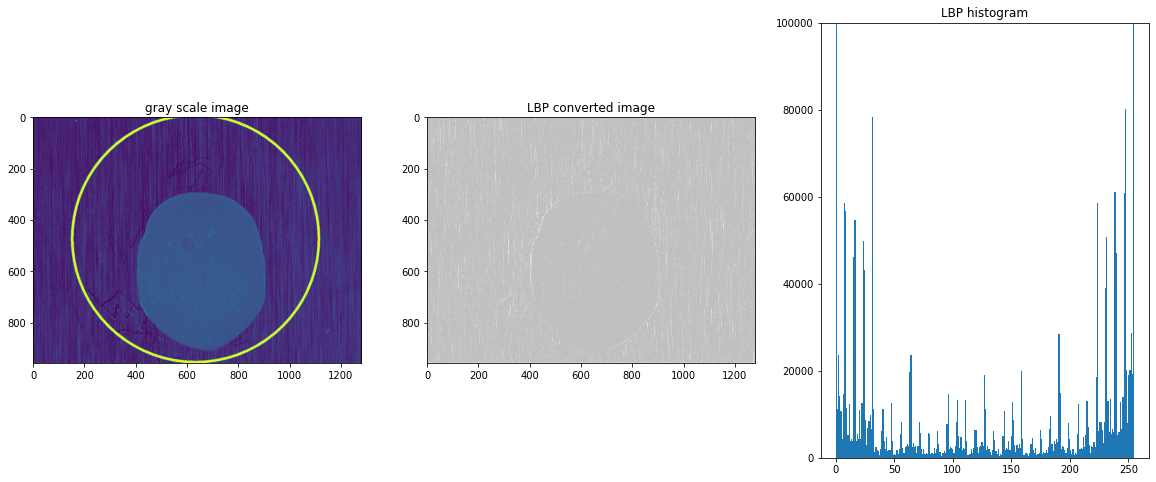

The number of circle is  1


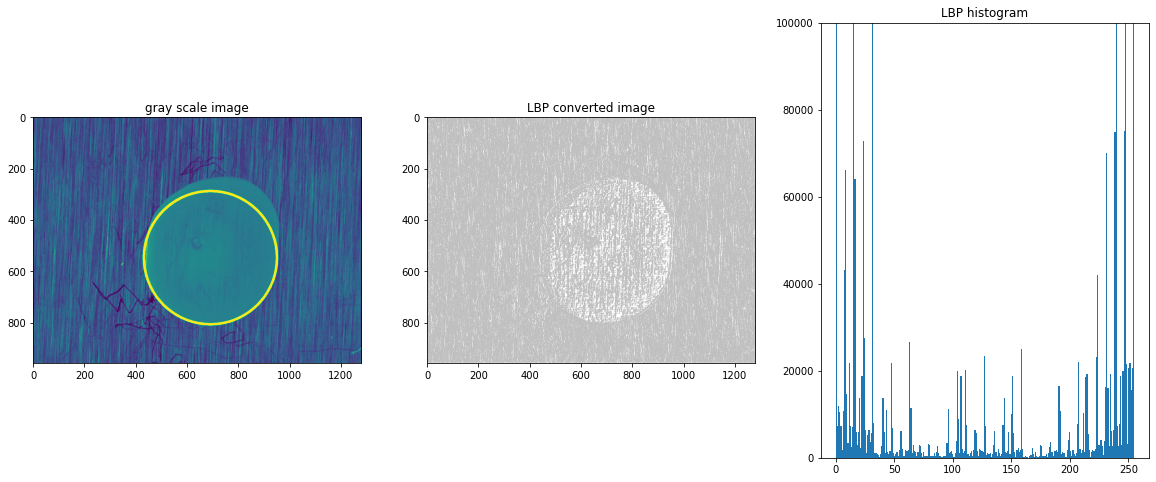

The number of circle is  1


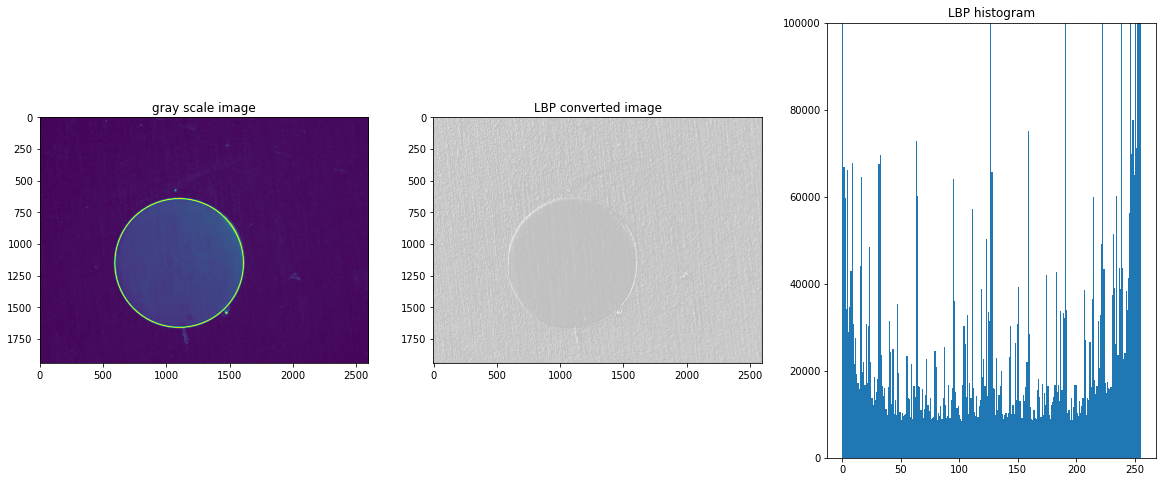

The number of circle is  1


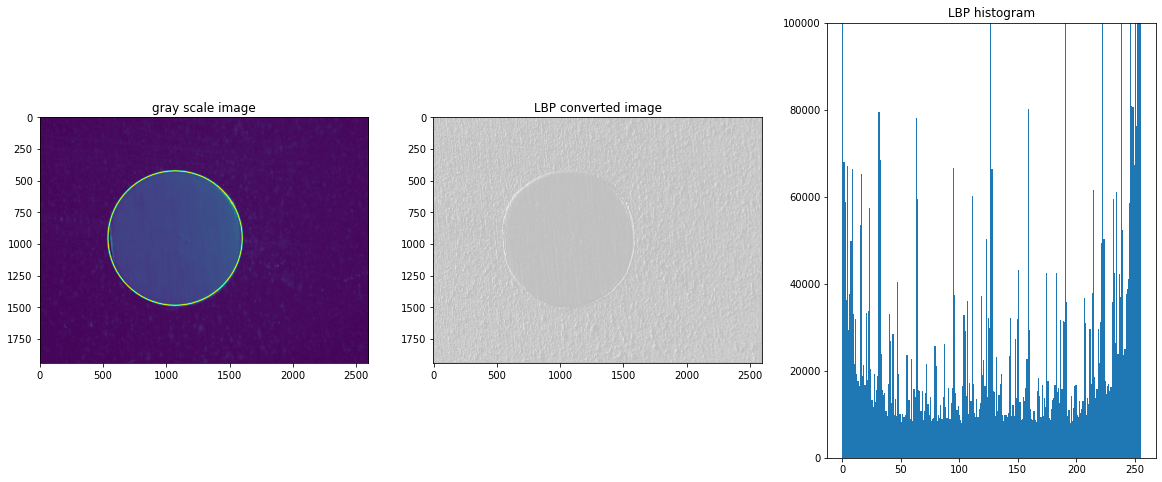

The number of circle is  1


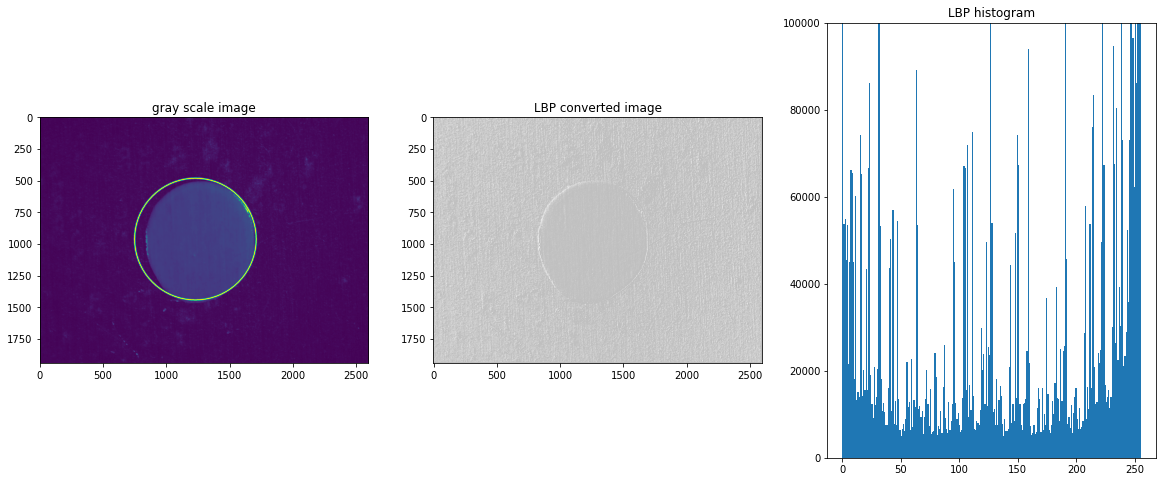

The number of circle is  1


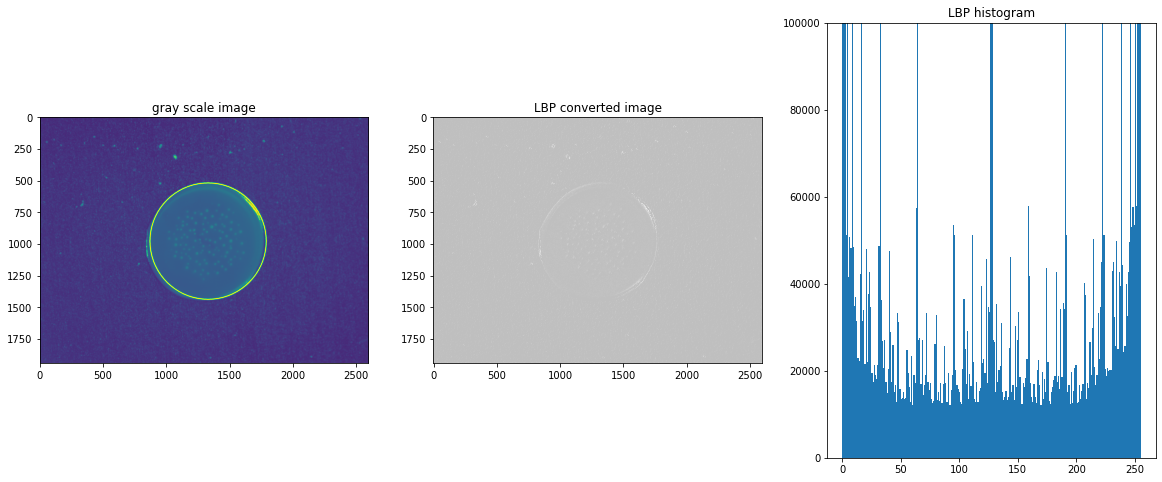

The number of circle is  1


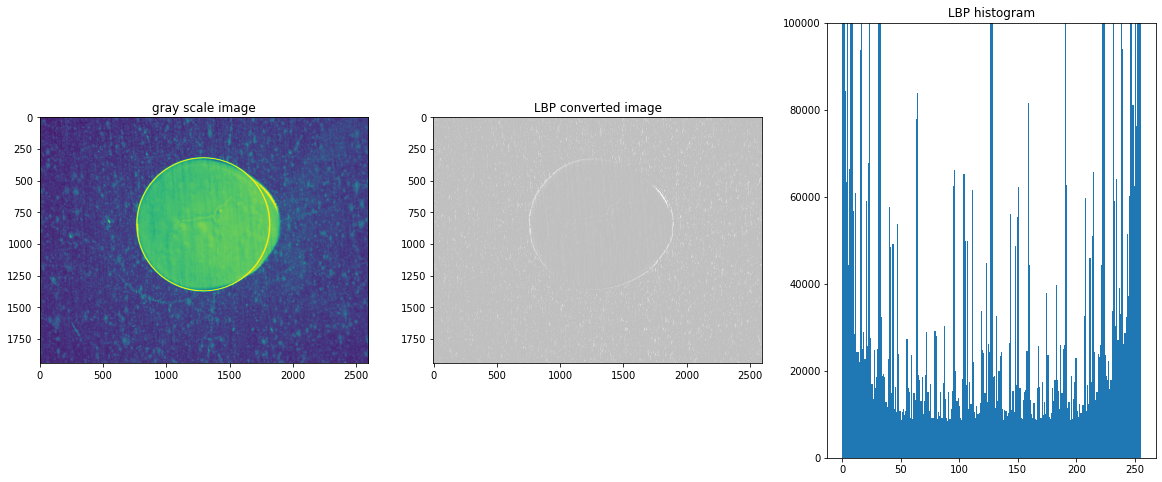

The number of circle is  1


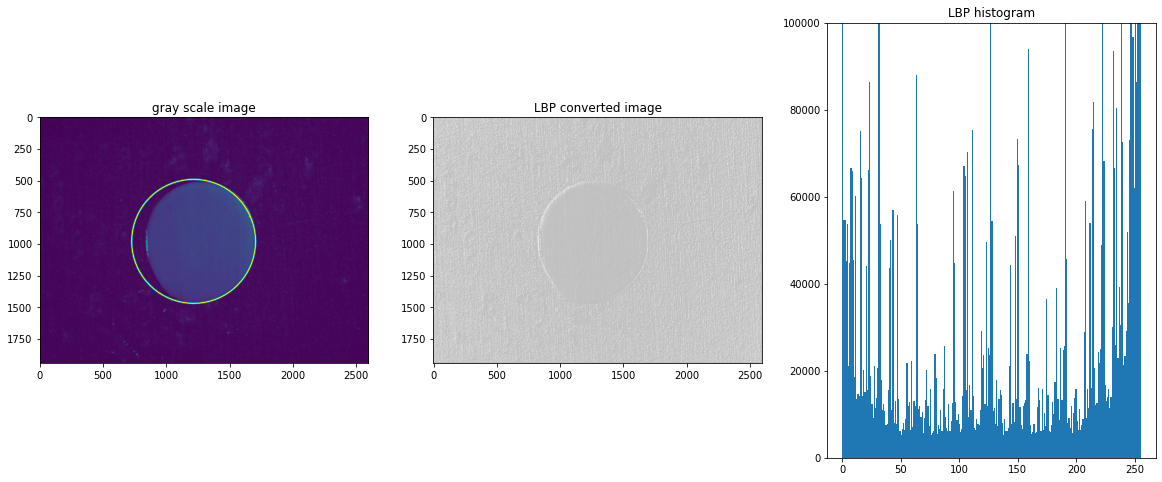

The number of circle is  1


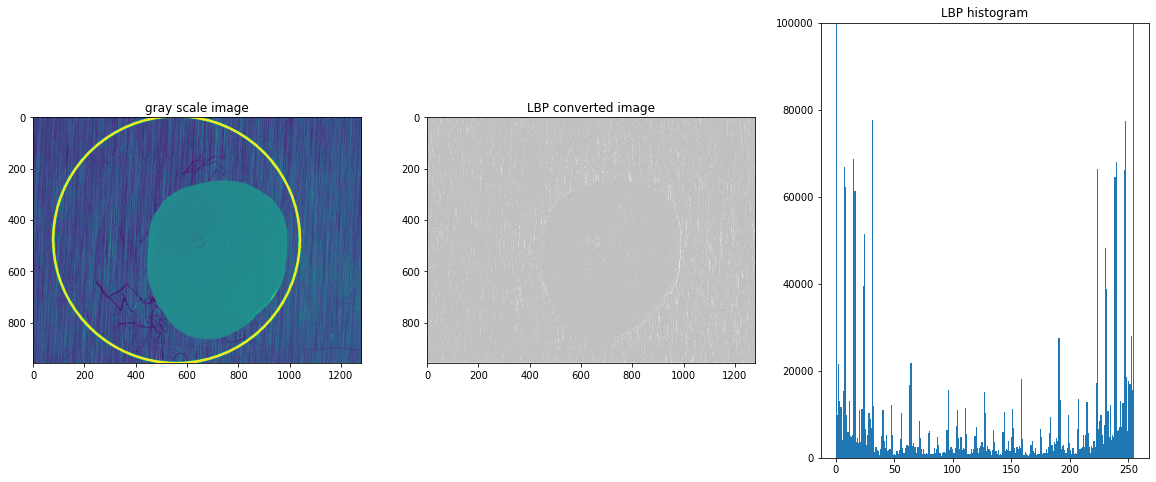

In [7]:
main_lbp(p_pc)